In [1]:
import pandas as pd
import numpy as np

import nltk

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary


from sklearn.feature_extraction.text import CountVectorizer


In [2]:
data = pd.read_csv('Elderly_survey_final.csv')

In [3]:
for col in data.columns: 
    print(col) 

StartDate
EndDate
Status
IPAddress
Progress
Duration (in seconds)
Finished
RecordedDate
ResponseId
RecipientLastName
RecipientFirstName
RecipientEmail
ExternalReference
LocationLatitude
LocationLongitude
DistributionChannel
UserLanguage
Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
Q10
Q11
Q12
Q13
Q14
Q15
Q16
Q17
Q18
Q19
Q20
Q21
Q22
Q23
Q24
Q25
Q26
Q27
Q28
Q29
Q30
Q31
Q23 - Parent Topics
Q23 - Sentiment Polarity
Q23 - Sentiment Score
Q23 - Sentiment
Q23 - Topic Sentiment Label
Q23 - Topic Sentiment Score
Q23 - Topics


In [4]:
#getting rid of unnecessary columns at the front
data.drop(data.iloc[:, 0:18], inplace = True, axis = 1) 
  

In [5]:
#to get rid of unnecessary columns at the back
data.drop(data.iloc[:, 30:37], inplace = True, axis = 1) 
  

In [6]:
data

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31
0,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat...,Are you working currently?你现在还有工作吗？Adakah anda...,How often do you come to Bras Basah-Bugis Dist...,What kind of activities do you do in your free...,Do you wish you can have an opportunity to int...,How often do you exercise?你有运动的吗？如果有，请问你多时常做运动...,What is your reason for not exercising? 请问为什么...,What are some forms of exercise which you do?你...,...,What would you say is your understanding of te...,If no understanding or very little understandi...,What kind of technologies and/or apps do you u...,Would you like to learn more about using vario...,"If yes, what would you want to learn?如果您想要学，您会...",Do you know how to shop online? 请问您懂得如何在网上购物吗？...,"If yes, What are some reasons you shop online?...",What are some reasons you don't shop online?请问...,"If there are guidance, do you wish you know ho...",What type of skill workshops would you be inte...
1,"{""ImportId"":""QID31""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID15_TEXT""}","{""ImportId"":""QID24""}","{""ImportId"":""QID1""}","{""ImportId"":""QID45_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID11""}","{""ImportId"":""QID30_TEXT""}","{""ImportId"":""QID37_TEXT""}",...,"{""ImportId"":""QID49""}","{""ImportId"":""QID50_TEXT""}","{""ImportId"":""QID46""}","{""ImportId"":""QID47""}","{""ImportId"":""QID48""}","{""ImportId"":""QID17""}","{""ImportId"":""QID20_TEXT""}","{""ImportId"":""QID38_TEXT""}","{""ImportId"":""QID18""}","{""ImportId"":""QID12_TEXT""}"
2,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,NaN,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,NaN,No,NaN,Use phone to call,No,NaN
3,Male,46,20 km from bugis,Yes,Daily,Always taking care of the shop,No,I don't exercise,Lazy man,NaN,...,Very well （懂很多）(Baik),NaN,"Computer （电脑）(Komputer),Smart Phone （智能手机）(Tel...",No,NaN,No,NaN,No money and inconvenient,No,Not interested
4,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,NaN,Qigong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,NaN,No,NaN,No need,No,NaN
5,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,NaN,...,No understanding （完全不懂）(Tidak ada),Never encounter,NaN,Yes,Smart Phone （智能手机) (Telefon Pintar),No,NaN,No smart phone,Yes,Not sure
6,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,NaN,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,NaN,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
7,Male,80,Marine Parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,NaN,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,NaN,No,NaN,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
8,Male,87,Tanjong Pagar,No,Once a Month,"Go to CC and chat, swimming, qigong",Yes,4 times a week to everyday,NaN,"Swimming, brisk walking, qigong",...,A little （懂一点点）(Sikit),"Too tedious, may appear disconnected because g...","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Facebook（脸...",No,NaN,Because I dont know. Sacred that wife will sco...,Yes,Learn how to send photo using whatsapp
9,Male,60,Chinatown,Yes,Daily,"Take a stroll, meet friends",No,4 times a week to everyday,NaN,"Walking, taking a stroll",...,A little （懂一点点）(Sikit),"Difficult to surf, download games and apps","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Other Mobi...",No,NaN,"Security reasons, pr

In [7]:
#getting rid of row 1
data.drop([1],axis=0)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31
0,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat...,Are you working currently?你现在还有工作吗？Adakah anda...,How often do you come to Bras Basah-Bugis Dist...,What kind of activities do you do in your free...,Do you wish you can have an opportunity to int...,How often do you exercise?你有运动的吗？如果有，请问你多时常做运动...,What is your reason for not exercising? 请问为什么...,What are some forms of exercise which you do?你...,...,What would you say is your understanding of te...,If no understanding or very little understandi...,What kind of technologies and/or apps do you u...,Would you like to learn more about using vario...,"If yes, what would you want to learn?如果您想要学，您会...",Do you know how to shop online? 请问您懂得如何在网上购物吗？...,"If yes, What are some reasons you shop online?...",What are some reasons you don't shop online?请问...,"If there are guidance, do you wish you know ho...",What type of skill workshops would you be inte...
2,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,NaN,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,NaN,No,NaN,Use phone to call,No,NaN
3,Male,46,20 km from bugis,Yes,Daily,Always taking care of the shop,No,I don't exercise,Lazy man,NaN,...,Very well （懂很多）(Baik),NaN,"Computer （电脑）(Komputer),Smart Phone （智能手机）(Tel...",No,NaN,No,NaN,No money and inconvenient,No,Not interested
4,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,NaN,Qigong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,NaN,No,NaN,No need,No,NaN
5,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,NaN,...,No understanding （完全不懂）(Tidak ada),Never encounter,NaN,Yes,Smart Phone （智能手机) (Telefon Pintar),No,NaN,No smart phone,Yes,Not sure
6,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,NaN,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,NaN,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
7,Male,80,Marine Parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,NaN,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,NaN,No,NaN,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
8,Male,87,Tanjong Pagar,No,Once a Month,"Go to CC and chat, swimming, qigong",Yes,4 times a week to everyday,NaN,"Swimming, brisk walking, qigong",...,A little （懂一点点）(Sikit),"Too tedious, may appear disconnected because g...","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Facebook（脸...",No,NaN,Because I dont know. Sacred that wife will sco...,Yes,Learn how to send photo using whatsapp
9,Male,60,Chinatown,Yes,Daily,"Take a stroll, meet friends",No,4 times a week to everyday,NaN,"Walking, taking a stroll",...,A little （懂一点点）(Sikit),"Difficult to surf, download games and apps","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Other Mobi...",No,NaN,"Security reasons, product issues",No,"Google, surfing internet, searching for inform..."
10,Male,82,Havelock Road,No,Few times a Week,Walk,Yes,I don't exercise,He only walks,NaN,...,A little （懂一点点）(Sikit),He only use smartphone,Smart Phone （智能手机）(Telefon pintar),No,NaN,No,NaN,He only does traditional shopping.,No,No skills.


In [8]:
data.iloc[0].values

array(['Gender性别Jantina', 'Age岁数\nUmur',
       'Where do you live?请问您住在哪里？\nAnda tinggal dekat mana?',
       'Are you working currently?你现在还有工作吗？Adakah anda masih berkerja?',
       'How often do you come to Bras Basah-Bugis District?你有常来这个地区吗？如果有，请问您多常来？Apakah kekerapan anda datang ke Bras Basah-Bugis District?',
       'What kind of activities do you do in your free time?请问您有空的时候会参与什么活动？\nApakah aktiviti-aktiviti yang anda lakukan pada masa lapang?',
       'Do you wish you can have an opportunity to interact more with the youth?请问您有没有意念与青年们交流？Jika diberi peluang, adakah anda ingin berinteraksi dengan belia/orang muda?',
       'How often do you exercise?你有运动的吗？如果有，请问你多时常做运动？Berapa kali kamu bersen...',
       'What is your reason for not exercising?  请问为什么您没有运动的习惯？Apakah sebab anda tidak bersenam?',
       'What are some forms of exercise which you do?你都会做什么种类的运动？Apakah jenis senaman atau sukan yang anda lakukan?',
       'Would you travel less than 20 minutes to a place to exerci

In [9]:
#making row 0 the header
new_header = data.iloc[0] 

data = data[2:26] 

data.columns = new_header

In [10]:
data

,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat mana?,Are you working currently?你现在还有工作吗？Adakah anda masih berkerja?,How often do you come to Bras Basah-Bugis District?你有常来这个地区吗？如果有，请问您多常来？Apakah kekerapan anda datang ke Bras Basah-Bugis District?,What kind of activities do you do in your free time?请问您有空的时候会参与什么活动？\nApakah aktiviti-aktiviti yang anda lakukan pada masa lapang?,"Do you wish you can have an opportunity to interact more with the youth?请问您有没有意念与青年们交流？Jika diberi peluang, adakah anda ingin berinteraksi dengan belia/orang muda?",How often do you exercise?你有运动的吗？如果有，请问你多时常做运动？Berapa kali kamu bersen...,What is your reason for not exercising? 请问为什么您没有运动的习惯？Apakah sebab anda tidak bersenam?,What are some forms of exercise which you do?你都会做什么种类的运动？Apakah jenis senaman atau sukan yang anda lakukan?,...,What would you say is your understanding of technology?你觉得你对科技的了解有多少？Seberapa dalam pengetahuan anda tentang teknologi?,"If no understanding or very little understanding, what do you think is the reason?你觉得为什么会完全不懂或懂得很少呢？Jika pengetahuan anda tidak cukup, apakah sebabnya?",What kind of technologies and/or apps do you use?请问您有用到哪一种科技或应用程式？Apakah jenis teknologi/applikasi yang anda gunakan?,Would you like to learn more about using various technologies or apps if there are free courses/guidance by youths?假如大学生可以举办免费的课程或指点，您会想要多了解多样化的科技或应用程式吗？Akankah anda belajar tentang teknologi ataupun applikasi jika pelajar universiti memberikan kursus/bimbingan percuma?,"If yes, what would you want to learn?如果您想要学，您会想要学什么？\nApakah yang anda ingin ketahui?",Do you know how to shop online? 请问您懂得如何在网上购物吗？Adakah anda ketahui cara-cara membeli belah dalam talian?,"If yes, What are some reasons you shop online?请问您可以透露您网上购物的原因吗？Kenapa anda suka membeli belah dalam talian?",What are some reasons you don't shop online?请问您不使用网上购物的原因是什么？Kenapa anda tidak suka membeli belah dalam talian?,"If there are guidance, do you wish you know how to shop online safely to make your life more convenient?如果我们给与指点，您是否会想了解如何安全地在网上购物，好让您的生活更方便？Jika ada pertolongan, adakah kamu ingin tahu cara-cara untuk membeli belah dalam talian dengan mudah dan selamat?",What type of skill workshops would you be interested in to develop yourself?请问您对任何技能作坊感兴趣？Apakah jenis kursus kemahiran yang anda ingin hadiri untuk memperbaiki diri anda?
2,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,NaN,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,NaN,No,NaN,Use phone to call,No,NaN
3,Male,46,20 km from bugis,Yes,Daily,Always taking care of the shop,No,I don't exercise,Lazy man,NaN,...,Very well （懂很多）(Baik),NaN,"Computer （电脑）(Komputer),Smart Phone （智能手机）(Tel...",No,NaN,No,NaN,No money and inconvenient,No,Not interested
4,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,NaN,Qigong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,NaN,No,NaN,No need,No,NaN
5,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,NaN,...,No understanding （完全不懂）(Tidak ada),Never encounter,NaN,Yes,Smart Phone （智能手机) (Telefon Pintar),No,NaN,No smart phone,Yes,Not sure
6,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,NaN,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,NaN,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
7,Male,80,Marine Parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,NaN,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,NaN,No,NaN,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
8,Male,87,Tanjon

In [11]:
#getting rid of rows which are not about eldelry
data.drop( data[data['Age岁数\nUmur'].astype(int) < 60 ].index , inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:

data = data.replace(np.nan, '', regex=True)
data

,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat mana?,Are you working currently?你现在还有工作吗？Adakah anda masih berkerja?,How often do you come to Bras Basah-Bugis District?你有常来这个地区吗？如果有，请问您多常来？Apakah kekerapan anda datang ke Bras Basah-Bugis District?,What kind of activities do you do in your free time?请问您有空的时候会参与什么活动？\nApakah aktiviti-aktiviti yang anda lakukan pada masa lapang?,"Do you wish you can have an opportunity to interact more with the youth?请问您有没有意念与青年们交流？Jika diberi peluang, adakah anda ingin berinteraksi dengan belia/orang muda?",How often do you exercise?你有运动的吗？如果有，请问你多时常做运动？Berapa kali kamu bersen...,What is your reason for not exercising? 请问为什么您没有运动的习惯？Apakah sebab anda tidak bersenam?,What are some forms of exercise which you do?你都会做什么种类的运动？Apakah jenis senaman atau sukan yang anda lakukan?,...,What would you say is your understanding of technology?你觉得你对科技的了解有多少？Seberapa dalam pengetahuan anda tentang teknologi?,"If no understanding or very little understanding, what do you think is the reason?你觉得为什么会完全不懂或懂得很少呢？Jika pengetahuan anda tidak cukup, apakah sebabnya?",What kind of technologies and/or apps do you use?请问您有用到哪一种科技或应用程式？Apakah jenis teknologi/applikasi yang anda gunakan?,Would you like to learn more about using various technologies or apps if there are free courses/guidance by youths?假如大学生可以举办免费的课程或指点，您会想要多了解多样化的科技或应用程式吗？Akankah anda belajar tentang teknologi ataupun applikasi jika pelajar universiti memberikan kursus/bimbingan percuma?,"If yes, what would you want to learn?如果您想要学，您会想要学什么？\nApakah yang anda ingin ketahui?",Do you know how to shop online? 请问您懂得如何在网上购物吗？Adakah anda ketahui cara-cara membeli belah dalam talian?,"If yes, What are some reasons you shop online?请问您可以透露您网上购物的原因吗？Kenapa anda suka membeli belah dalam talian?",What are some reasons you don't shop online?请问您不使用网上购物的原因是什么？Kenapa anda tidak suka membeli belah dalam talian?,"If there are guidance, do you wish you know how to shop online safely to make your life more convenient?如果我们给与指点，您是否会想了解如何安全地在网上购物，好让您的生活更方便？Jika ada pertolongan, adakah kamu ingin tahu cara-cara untuk membeli belah dalam talian dengan mudah dan selamat?",What type of skill workshops would you be interested in to develop yourself?请问您对任何技能作坊感兴趣？Apakah jenis kursus kemahiran yang anda ingin hadiri untuk memperbaiki diri anda?
2,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,,No,,Use phone to call,No,
4,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,,Qigong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,,No,,No need,No,
5,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,,...,No understanding （完全不懂）(Tidak ada),Never encounter,,Yes,Smart Phone （智能手机) (Telefon Pintar),No,,No smart phone,Yes,Not sure
6,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
7,Male,80,Marine Parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,,No,,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
8,Male,87,Tanjong Pagar,No,Once a Month,"Go to CC and chat, swimming, qigong",Yes,4 times a week to everyday,,"Swimming, brisk walking, qigong",...,A little （懂一点点）(Sikit),"Too tedious, may appear disconnected because g...","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telef

In [13]:
#about to do analysis on the specific column to find what kind of activities elderly are likely to do in their free time.
#what kind of exercises they do
# what kind of skills they wanna learn
freetime_exercise_workshop = data[['What kind of activities do you do in your free time?请问您有空的时候会参与什么活动？\nApakah aktiviti-aktiviti yang anda lakukan pada masa lapang?','What type of skill workshops would you be interested in to develop yourself?请问您对任何技能作坊感兴趣？Apakah jenis kursus kemahiran yang anda ingin hadiri untuk memperbaiki diri anda?']]

In [14]:
#converting dataframe to list
list_freetime_exercise_workshop = freetime_exercise_workshop.values.tolist()

In [15]:
print(list_freetime_exercise_workshop)

[['Stay at home, read newspaper', ''], ['Use FB, brisk walking ', ''], ['Sell flowers', 'Not sure'], ['Play and visit friends', 'Open to any workshops as long as can attend and convenient to attend'], ['Look after dying people at Dover Park hospice.', 'No skills. He just want to help people who are suffering from chronic illness.'], ['Go to CC and chat, swimming, qigong', 'Learn how to send photo using whatsapp'], ['Take a stroll, meet friends', 'Google, surfing internet, searching for information'], ['Walk', 'No skills.'], ['Walk around and use public transport to go around', ''], ['Walk, swimming ', 'IT related'], ['Exercise 10k steps, attending voluntary work, photograph as hobby', 'Photography, smart phone function related.'], ['Visit parents', 'Wont join any'], ['Shopping ', 'Nil'], ['Drink coffee with friends', 'English language '], ['Chess, talk with friends, swimming', 'No interest'], ['Reach out to people to help the poor', 'Hospitality/Hotel industry-related skills'], ['Rest,

In [16]:
from nltk.tokenize import word_tokenize
 

#create lemmatizer
wnl = nltk.stem.wordnet.WordNetLemmatizer()


In [37]:
from nltk.corpus import stopwords
import string
stop_list = stopwords.words('english') + [char for char in string.punctuation] + ['nil','Nil','NIL','None','none'] + ['go','around','take'+'use','using','related']

print(stop_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [175]:

def listToString(s):  
     
    str1 = " " 
    
    # return string   
    return (str1.join(s))


def process_allresponses(list_of_responses):
    processed_responses = []
    response_tokens = []
    for response in list_of_responses:
        response = listToString(response)
        response = response.lower()
        response_tokens = word_tokenize(response)
        response_tokens = [token for token in response_tokens if token not in stop_list]
        response_tokens = [wnl.lemmatize(token) for token in response_tokens] 
#       print(response_tokens)
        response_tokens = [token for token in response_tokens if len(token) > 1]
        
        processed_responses.append(" ".join(response_tokens))
    
    return processed_responses
print(process_allresponses(list_freetime_exercise_workshop))


# def process_allresponses(list_of_responses, mwe):
#     processed_responses = []
#     response_tokens = []
#     protected_tuples = [word_tokenize(word) for word in mwe]
#     protected_tuples_underscore = ['_'.join(word) for word in protected_tuples]
#     tokenizer = MWETokenizer(protected_tuples)
#     for response in list_of_responses:
#         response = listToString(response)
#         response = response.lower()
#         response_tokens = word_tokenize(response)
#         response_tokens = [token for token in response_tokens if token not in stop_list]
#         response_tokens = [wnl.lemmatize(token) for token in response_tokens]
# #         print(tweet_tokens)
#         response_tokens = [token for token in response_tokens if len(token) > 1]
#         for token in response_tokens:
#             for i,word in enumerate(token):
#                 if word in protected_tuples_underscore:
#                     token[i] = mwe[protected_tuples_underscore.index(token)]
#         processed_responses.append(" ".join(response_tokens))
#     return processed_responses
#     for processed_response in processed_responses:
        
#         for i,token in enumerate(processed_response):
#             if token in protected_tuples_underscore:
#                 processed_response[i] = mwe[protected_tuples_underscore.index(token)]
#         print(processed_response)    
        
# print(process_allresponses(list_freetime_exercise_workshop,['qi','gong']))

#I WANT TO MERGE qi and gong
# I WANT TO MERGE go and around

['stay home read newspaper', 'use fb brisk walking', 'sell flower', 'play visit friend open workshop long attend convenient attend', 'look dying people dover park hospice skill want help people suffering chronic illness', 'cc chat swimming qigong learn send photo whatsapp', 'stroll friend google surfing internet searching information', 'walk skill', 'walk use public transport', 'walk swimming', '10k step attending voluntary work photograph hobby photography smart phone function', 'visit parent', '', 'drink coffee friend english language', 'chess talk friend swimming interest', 'reach people help poor hospitality/hotel industry-related skill', 'rest friend computer share speech', 'stitch read book play computer game art craft dress bag', 'house work sometimes friend learn', 'running cycling', 'eating friend', 'church friend english lesson', 'family play instrument gardening community work']


In [39]:
corpus = process_allresponses(list_freetime_exercise_workshop)
print(corpus)

['stay home read newspaper', 'use fb brisk walking', 'sell flower sure', 'play visit friend open workshop long attend convenient attend', 'look dying people dover park hospice skill want help people suffering chronic illness', 'cc chat swimming qigong learn send photo whatsapp', 'take stroll meet friend google surfing internet searching information', 'walk skill', 'walk use public transport', 'walk swimming', 'exercise 10k step attending voluntary work photograph hobby photography smart phone function', 'visit parent wont join', 'shopping', 'drink coffee friend english language', 'chess talk friend swimming interest', 'reach people help poor hospitality/hotel industry-related skill', 'rest meet friend exercise computer share speech', 'stitch read book play computer game art craft dress making making bag', 'house work shopping sometimes meet friend learn exercise', 'exercise running cycling', 'eating meet friend', 'church meet friend shopping english lesson', 'family play instrument gar

In [40]:

cv = CountVectorizer(corpus)
count_vect = cv.fit_transform(corpus)

In [41]:
vocab = cv.get_feature_names()
cv_matrix = count_vect.toarray()

In [42]:
from sklearn.feature_extraction.text import CountVectorizer 
texts = corpus
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)


[('friend', 8),
 ('meet', 5),
 ('exercise', 4),
 ('play', 3),
 ('people', 3),
 ('skill', 3),
 ('swimming', 3),
 ('walk', 3),
 ('work', 3),
 ('shopping', 3),
 ('read', 2),
 ('use', 2),
 ('visit', 2),
 ('attend', 2),
 ('help', 2),
 ('learn', 2),
 ('english', 2),
 ('computer', 2),
 ('making', 2),
 ('stay', 1),
 ('home', 1),
 ('newspaper', 1),
 ('fb', 1),
 ('brisk', 1),
 ('walking', 1),
 ('sell', 1),
 ('flower', 1),
 ('sure', 1),
 ('open', 1),
 ('workshop', 1),
 ('long', 1),
 ('convenient', 1),
 ('look', 1),
 ('dying', 1),
 ('dover', 1),
 ('park', 1),
 ('hospice', 1),
 ('want', 1),
 ('suffering', 1),
 ('chronic', 1),
 ('illness', 1),
 ('cc', 1),
 ('chat', 1),
 ('qigong', 1),
 ('send', 1),
 ('photo', 1),
 ('whatsapp', 1),
 ('take', 1),
 ('stroll', 1),
 ('google', 1),
 ('surfing', 1),
 ('internet', 1),
 ('searching', 1),
 ('information', 1),
 ('public', 1),
 ('transport', 1),
 ('10k', 1),
 ('step', 1),
 ('attending', 1),
 ('voluntary', 1),
 ('photograph', 1),
 ('hobby', 1),
 ('photography', 

In [43]:
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# %matplotlib inline

# def plot_10_most_common_activities(count_data, words):
#     import matplotlib.pyplot as plt
#     #words = count_vectorizer.get_feature_names()
#     total_counts = np.zeros(len(words))
#     for t in count_data:
#         total_counts+=t.toarray()[0]
    
#     count_dict = (zip(words, total_counts))
#     count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
#     words = [w[0] for w in count_dict]
#     counts = [w[1] for w in count_dict]
#     x_pos = np.arange(len(words)) 
    
#     plt.figure(2, figsize=(15, 15/1.6180))
#     plt.subplot(title='10 Most Common Activities')
#     sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
#     sns.barplot(x_pos, counts, palette='husl')
#     plt.xticks(x_pos, words, rotation=90) 
#     plt.xlabel('Activity name')
#     plt.ylabel('counts')
#     plt.show()
    
# # Initialise the count vectorizer with the English stop words
# count_vectorizer = vocab
# # Fit and transform the processed titles
# count_data = count_vect
# # Visualise the 10 most common words
# plot_10_most_common_activities(count_data, count_vectorizer)


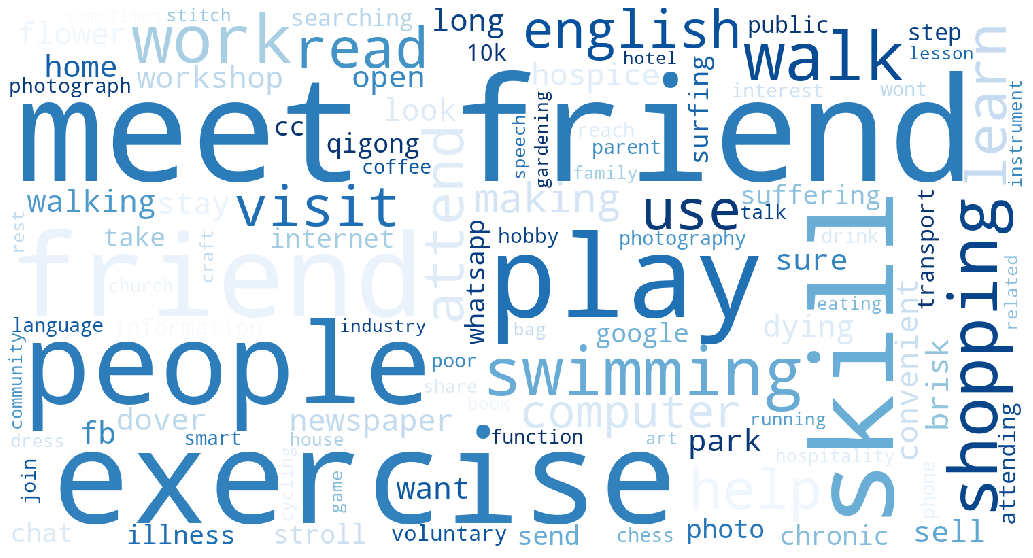

In [44]:
#do wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
my_wordcloud = WordCloud(background_color='white',
                         width=1500,
                         height=800,colormap="Blues").generate(listToString(corpus))
plt.figure(figsize=(20,10))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()



In [166]:
from nltk.corpus import stopwords
import string
stop_list = ['friend','join','sure','take','making'] + ['meet','exercise','wont','shopping'] + stopwords.words('english') + [char for char in string.punctuation] + ['nil','Nil','NIL','None','none'] + ['go','around','take'+'use','using','related']


def process_allresponses(list_of_responses):
    processed_responses = []
    response_tokens = []
    for response in list_of_responses:
        response = listToString(response)
        response = response.lower()
        response_tokens = word_tokenize(response)
        response_tokens = [wnl.lemmatize(token) for token in response_tokens]
        response_tokens = [token for token in response_tokens if token not in stop_list]
         
#         print(tweet_tokens)
        response_tokens = [token for token in response_tokens if len(token) > 1]
        processed_responses.append(response_tokens)
    
    return processed_responses
print(process_allresponses(list_freetime_exercise_workshop))



[['stay', 'home', 'read', 'newspaper'], ['use', 'fb', 'brisk', 'walking'], ['sell', 'flower'], ['play', 'visit', 'open', 'workshop', 'long', 'attend', 'convenient', 'attend'], ['look', 'dying', 'people', 'dover', 'park', 'hospice', 'skill', 'want', 'help', 'people', 'suffering', 'chronic', 'illness'], ['cc', 'chat', 'swimming', 'qigong', 'learn', 'send', 'photo', 'whatsapp'], ['stroll', 'google', 'surfing', 'internet', 'searching', 'information'], ['walk', 'skill'], ['walk', 'use', 'public', 'transport'], ['walk', 'swimming'], ['10k', 'step', 'attending', 'voluntary', 'work', 'photograph', 'hobby', 'photography', 'smart', 'phone', 'function'], ['visit', 'parent'], [], ['drink', 'coffee', 'english', 'language'], ['chess', 'talk', 'swimming', 'interest'], ['reach', 'people', 'help', 'poor', 'hospitality/hotel', 'industry-related', 'skill'], ['rest', 'computer', 'share', 'speech'], ['stitch', 'read', 'book', 'play', 'computer', 'game', 'art', 'craft', 'dress', 'bag'], ['house', 'work', 's

In [167]:
processed_allresponses = process_allresponses(list_freetime_exercise_workshop)
dictionary = gensim.corpora.Dictionary(processed_allresponses)
print(dictionary)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))


Dictionary(91 unique tokens: ['home', 'newspaper', 'read', 'stay', 'brisk']...)
Sample word to number mappings: [(0, 'home'), (1, 'newspaper'), (2, 'read'), (3, 'stay'), (4, 'brisk'), (5, 'fb'), (6, 'use'), (7, 'walking'), (8, 'flower'), (9, 'sell'), (10, 'attend'), (11, 'convenient'), (12, 'long'), (13, 'open'), (14, 'play')]
Total Vocabulary Size: 91


Bag of Words Model

In [168]:
corpus_vect = [dictionary.doc2bow(text) for text in processed_allresponses]
print(corpus_vect)


[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1)], [(10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1)], [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)], [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(26, 1), (43, 1)], [(6, 1), (43, 1), (44, 1), (45, 1)], [(35, 1), (43, 1)], [(46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(15, 1), (57, 1)], [], [(58, 1), (59, 1), (60, 1), (61, 1)], [(35, 1), (62, 1), (63, 1), (64, 1)], [(20, 1), (25, 1), (26, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(69, 1), (70, 1), (71, 1), (72, 1)], [(2, 1), (14, 1), (69, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(31, 1), (56, 1), (80, 1), (81, 1)], [(82, 1), (83, 1)], [(84, 1)], [(60, 1), (85, 1), (86, 1)], [(14, 1), (56, 1), (87, 1), (88, 1), (

Gensim LDA

In [169]:
num_topics = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word=dictionary, passes=5, random_state= 0)

In [170]:
print(type(ldamodel))

<class 'gensim.models.ldamodel.LdaModel'>


In [172]:
for num ,topic in ldamodel.show_topics(formatted=True, num_topics=num_topics, num_words=8):
    print(str(num)+": "+ topic)

0: 0.046*"computer" + 0.046*"read" + 0.025*"stitch" + 0.025*"craft" + 0.025*"art" + 0.025*"game" + 0.025*"book" + 0.025*"dress"
1: 0.055*"people" + 0.030*"skill" + 0.030*"help" + 0.030*"dying" + 0.030*"look" + 0.030*"park" + 0.030*"illness" + 0.030*"hobby"
2: 0.067*"work" + 0.036*"skill" + 0.036*"poor" + 0.036*"industry-related" + 0.036*"hospitality/hotel" + 0.036*"family" + 0.036*"instrument" + 0.036*"reach"
3: 0.080*"walk" + 0.043*"use" + 0.043*"english" + 0.043*"walking" + 0.043*"fb" + 0.043*"drink" + 0.043*"language" + 0.043*"brisk"
4: 0.040*"swimming" + 0.040*"learn" + 0.040*"chat" + 0.040*"cc" + 0.040*"qigong" + 0.040*"whatsapp" + 0.040*"send" + 0.040*"photo"
5: 0.080*"attend" + 0.043*"visit" + 0.043*"swimming" + 0.043*"play" + 0.043*"long" + 0.043*"open" + 0.043*"workshop" + 0.043*"convenient"


In [173]:
new_doc_bow = [dictionary.doc2bow(text) for text in processed_allresponses]

for i in range(0,23):
    #print(new_doc_bow)
    document_topics = ldamodel.get_document_topics(new_doc_bow)
    print("\n Document :", i)
    print(document_topics[i])    



 Document : 0
[(0, 0.8333258), (1, 0.033334546), (2, 0.033334766), (3, 0.033334993), (4, 0.033334892), (5, 0.033334993)]

 Document : 1
[(0, 0.033390082), (1, 0.033334143), (2, 0.03333429), (3, 0.8332727), (4, 0.033334374), (5, 0.03333444)]

 Document : 2
[(0, 0.7222065), (1, 0.055558085), (2, 0.055558555), (3, 0.055559035), (4, 0.055558823), (5, 0.055559035)]

 Document : 3
[(0, 0.018533606), (1, 0.01851889), (2, 0.018540815), (3, 0.018519025), (4, 0.018543424), (5, 0.9073443)]

 Document : 4
[(0, 0.011905075), (1, 0.9404202), (2, 0.011944352), (3, 0.011919839), (4, 0.01190523), (5, 0.011905259)]

 Document : 5
[(0, 0.01851892), (1, 0.018518984), (2, 0.018542908), (3, 0.018547356), (4, 0.90732455), (5, 0.018547306)]

 Document : 6
[(0, 0.8809463), (1, 0.023810513), (2, 0.023810692), (3, 0.023810875), (4, 0.023810793), (5, 0.023810875)]

 Document : 7
[(0, 0.055641983), (1, 0.055805966), (2, 0.055867627), (3, 0.7215706), (4, 0.055556886), (5, 0.055556975)]

 Document : 8
[(0, 0.832669

In [32]:
from gensim.models import CoherenceModel

In [33]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=processed_allresponses, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)




Coherence Score:  0.49688533028955006


In [34]:
log_perplexity = ldamodel.log_perplexity(corpus_vect)
perplexity=2**(-log_perplexity)
print('Perplexity:',perplexity)


Perplexity: 45.55808619301996


In [174]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus_vect, dictionary)
vis

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.143098  0.084691       1        1  26.470337
1     -0.125202  0.062122       2        1  22.557987
2     -0.066857  0.032853       3        1  15.632306
4      0.006338 -0.103709       4        1  12.683444
5      0.018244 -0.059377       5        1  11.888778
3      0.024379 -0.016579       6        1  10.767154, topic_info=   Category      Freq      Term     Total  loglift  logprob
43  Default  2.000000      walk  2.000000  30.0000  30.0000
10  Default  1.000000    attend  1.000000  29.0000  29.0000
35  Default  1.000000  swimming  1.000000  28.0000  28.0000
56  Default  2.000000      work  2.000000  27.0000  27.0000
60  Default  1.000000   english  1.000000  26.0000  26.0000
..      ...       ...       ...       ...      ...      ...
3    Topic6  0.073342      stay  1.157999  -0.5306  -5.0935
69   Topic6  0.073341  computer  1.781018  -0.9611  -5.0935
2    Topic6  0.073341      read  1.781017  -0.9612  -5.0935
20   Topic6  0.073341      help  1.713705  -0.9226  -5.0935
14   Topic6  0.073340      play  2.183118  -1.1647  -5.0935

[273 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
46        2  0.851594        10k
73        1  0.863547        art
10        5  0.663821     attend
47        2  0.851593  attending
74        1  0.863548        bag
...     ...       ...        ...
28        2  0.851592       want
36        4  0.982595   whatsapp
56        2  0.443831       work
56        3  0.443831       work
16        5  0.979700   workshop

[105 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 6, 4])